In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68355746dc15697c0fecdafdecf88a0b


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


599

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 3 of Set 1 | porto walter
Processing Record 4 of Set 1 | lasa
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | shelburne
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | bitung
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | saleaula
City not found. Skipping...
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | illapel
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | buraydah
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Se

Processing Record 41 of Set 4 | anadyr
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | rosario
Processing Record 44 of Set 4 | alyangula
Processing Record 45 of Set 4 | taoudenni
Processing Record 46 of Set 4 | coquimbo
Processing Record 47 of Set 4 | kaeo
Processing Record 48 of Set 4 | kimbe
Processing Record 49 of Set 4 | port blair
Processing Record 50 of Set 4 | recke
Processing Record 1 of Set 5 | yialos
City not found. Skipping...
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | srednekolymsk
Processing Record 4 of Set 5 | buariki
City not found. Skipping...
Processing Record 5 of Set 5 | cedar city
Processing Record 6 of Set 5 | gidole
Processing Record 7 of Set 5 | provideniya
Processing Record 8 of Set 5 | damaturu
Processing Record 9 of Set 5 | oistins
Processing Record 10 of Set 5 | vardo
Processing Record 11 of Set 5 | torrevieja
Processing Record 12 of Set 5 | rawah
Processing Record 13 of Set 5 | fortuna
Processing Reco

Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | izumo
Processing Record 33 of Set 8 | victorville
Processing Record 34 of Set 8 | alofi
Processing Record 35 of Set 8 | saint-augustin
Processing Record 36 of Set 8 | thompson
Processing Record 37 of Set 8 | achisay
City not found. Skipping...
Processing Record 38 of Set 8 | coalinga
Processing Record 39 of Set 8 | george town
Processing Record 40 of Set 8 | amderma
City not found. Skipping...
Processing Record 41 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 42 of Set 8 | baruun-urt
Processing Record 43 of Set 8 | klyuchi
Processing Record 44 of Set 8 | huilong
Processing Record 45 of Set 8 | katrineholm
Processing Record 46 of Set 8 | kavaratti
Processing Record 47 of Set 8 | hailakandi
Processing Record 48 of Set 8 | trelew
Processing Record 49 of Set 8 | angra
City not found. Skipping...
Processing Record 50 of Set 8 | bima
Processing Record 1 of Set 9 | san vicente
Processing Record 2 of 

Processing Record 17 of Set 12 | anar darreh
City not found. Skipping...
Processing Record 18 of Set 12 | kamen-rybolov
Processing Record 19 of Set 12 | rocha
Processing Record 20 of Set 12 | tulua
Processing Record 21 of Set 12 | aybak
City not found. Skipping...
Processing Record 22 of Set 12 | pavlikeni
Processing Record 23 of Set 12 | gat
Processing Record 24 of Set 12 | rungata
City not found. Skipping...
Processing Record 25 of Set 12 | mudbidri
Processing Record 26 of Set 12 | albion
Processing Record 27 of Set 12 | cabo san lucas
Processing Record 28 of Set 12 | chicama
Processing Record 29 of Set 12 | erzin
Processing Record 30 of Set 12 | san lawrenz
Processing Record 31 of Set 12 | ringas
Processing Record 32 of Set 12 | sangin
Processing Record 33 of Set 12 | yaan
Processing Record 34 of Set 12 | wolmaranstad
City not found. Skipping...
Processing Record 35 of Set 12 | rochegda
Processing Record 36 of Set 12 | washington
Processing Record 37 of Set 12 | camapua
Processing R

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,49.66,62,40,26.46,AR,2021-12-15 01:36:26
1,Porto Walter,-8.2686,-72.7439,73.33,98,45,3.06,BR,2021-12-15 01:36:26
2,Lasa,46.6166,10.7002,33.37,72,100,5.61,IT,2021-12-15 01:36:26
3,Mataura,-46.1927,168.8643,67.48,45,100,10.74,NZ,2021-12-15 01:36:27
4,Shelburne,44.0787,-80.2041,33.69,84,100,13.22,CA,2021-12-15 01:36:27
5,Mar Del Plata,-38.0023,-57.5575,69.10,87,75,5.01,AR,2021-12-15 01:33:12
6,Lorengau,-2.0226,147.2712,83.19,82,58,15.21,PG,2021-12-15 01:32:28
7,Bitung,1.4451,125.1824,83.25,63,88,2.06,ID,2021-12-15 01:36:28
8,Atuona,-9.8000,-139.0333,78.84,72,83,16.02,PF,2021-12-15 01:36:28
9,Kruisfontein,-34.0033,24.7314,56.88,89,0,2.71,ZA,2021-12-15 01:27:29


In [13]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-12-15 01:36:26,-54.8000,-68.3000,49.66,62,40,26.46
1,Porto Walter,BR,2021-12-15 01:36:26,-8.2686,-72.7439,73.33,98,45,3.06
2,Lasa,IT,2021-12-15 01:36:26,46.6166,10.7002,33.37,72,100,5.61
3,Mataura,NZ,2021-12-15 01:36:27,-46.1927,168.8643,67.48,45,100,10.74
4,Shelburne,CA,2021-12-15 01:36:27,44.0787,-80.2041,33.69,84,100,13.22
5,Mar Del Plata,AR,2021-12-15 01:33:12,-38.0023,-57.5575,69.10,87,75,5.01
6,Lorengau,PG,2021-12-15 01:32:28,-2.0226,147.2712,83.19,82,58,15.21
7,Bitung,ID,2021-12-15 01:36:28,1.4451,125.1824,83.25,63,88,2.06
8,Atuona,PF,2021-12-15 01:36:28,-9.8000,-139.0333,78.84,72,83,16.02
9,Kruisfontein,ZA,2021-12-15 01:27:29,-34.0033,24.7314,56.88,89,0,2.71


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


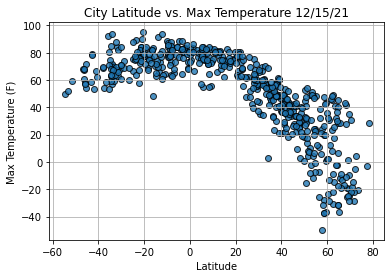

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.gca().invert_yaxis()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

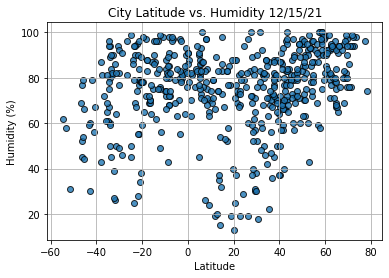

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


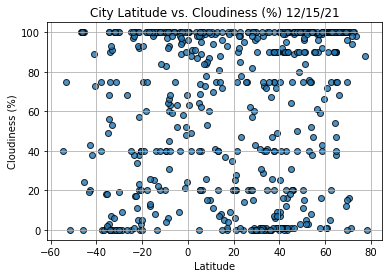

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

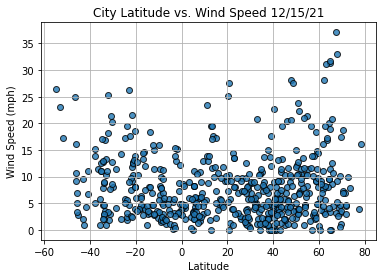

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


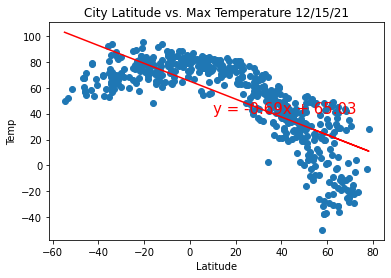

In [26]:
# # Perform linear regression.
# (slope, intercept, r_value, p_value, std_err) = linregress(lats,max_temps)

# # Calculate the regression line "y values" from the slope and intercept.
# regress_values = lats * slope + intercept

# # Get the equation of the line.
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Create a scatter plot of the x and y values.
# plt.scatter(lats,max_temps)
# # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
# plt.plot(lats,regress_values,"r")
# # Annotate the text for the line equation and add its coordinates.
# plt.annotate(line_eq, (10,40), fontsize=15, color="red")
# plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
# plt.xlabel('Latitude')
# plt.ylabel('Temp')
# plt.show()

In [58]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [59]:
index13=city_data_df.loc[13]
index13

City                      Illapel
Country                        CL
Date          2021-12-15 01:36:29
Lat                      -31.6308
Lng                      -71.1653
Max Temp                    63.09
Humidity                       64
Cloudiness                      0
Wind Speed                   1.88
Name: 13, dtype: object

In [60]:
city_data_df["Lat"]>= 0

0      False
1      False
2       True
3      False
4       True
       ...  
544     True
545    False
546     True
547     True
548     True
Name: Lat, Length: 549, dtype: bool

In [61]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Lasa,IT,2021-12-15 01:36:26,46.6166,10.7002,33.37,72,100,5.61
4,Shelburne,CA,2021-12-15 01:36:27,44.0787,-80.2041,33.69,84,100,13.22
7,Bitung,ID,2021-12-15 01:36:28,1.4451,125.1824,83.25,63,88,2.06
11,Ilulissat,GL,2021-12-15 01:29:51,69.2167,-51.1000,1.69,82,12,3.18
12,Ponta Do Sol,PT,2021-12-15 01:36:29,32.6667,-17.1000,58.01,81,98,4.99


In [62]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

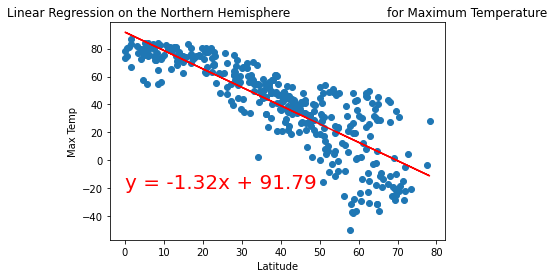

y = -1.32x + 91.79
The r-value is: -0.837


In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

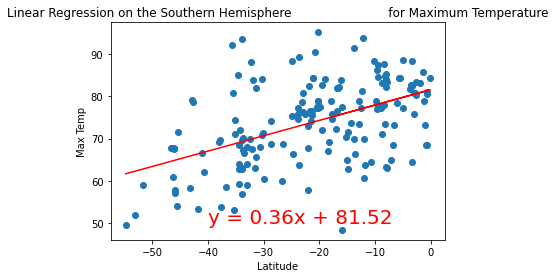

y = 0.36x + 81.52
The r-value is: 0.492


In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,50))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

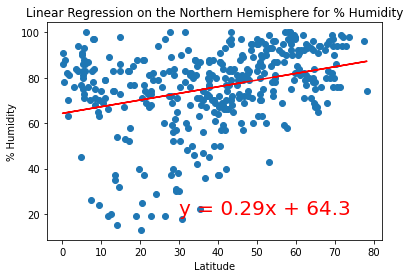

The r-value is: 0.318


In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(30,20))

print(f"The r-value is: {r_value:.3f}")



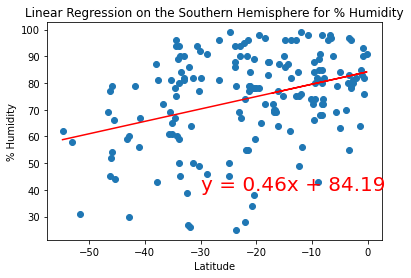

The r-value is: 0.318


In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-30,40))


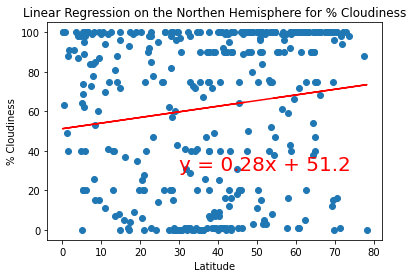

In [96]:
# Linear regression on the Northen Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northen Hemisphere for % Cloudiness','% Cloudiness',(30,30))


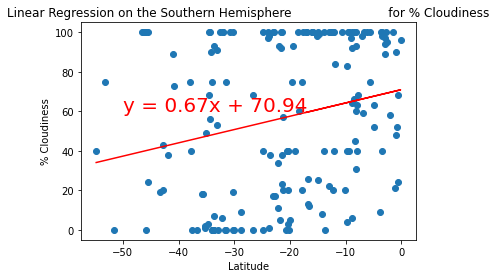

slope is:0.672,intercept is:70.943,r_value is:0.230,P_value is : 0.002,Standard Error is :0.218


In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
print(f"slope is:{slope:.3f},intercept is:{intercept:.3f},r_value is:{r_value:.3f},P_value is : {p_value:.3f},Standard Error is :{std_err:.3f}")

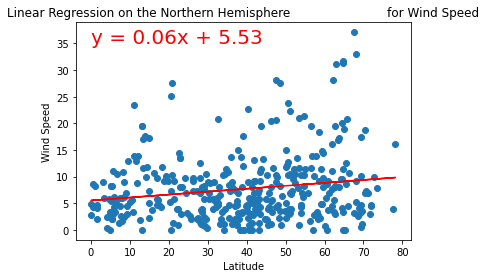

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))